<a href="https://colab.research.google.com/github/sahana230810/sahanaaji/blob/main/NM%20PRO%20SA%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          Car        51.0    

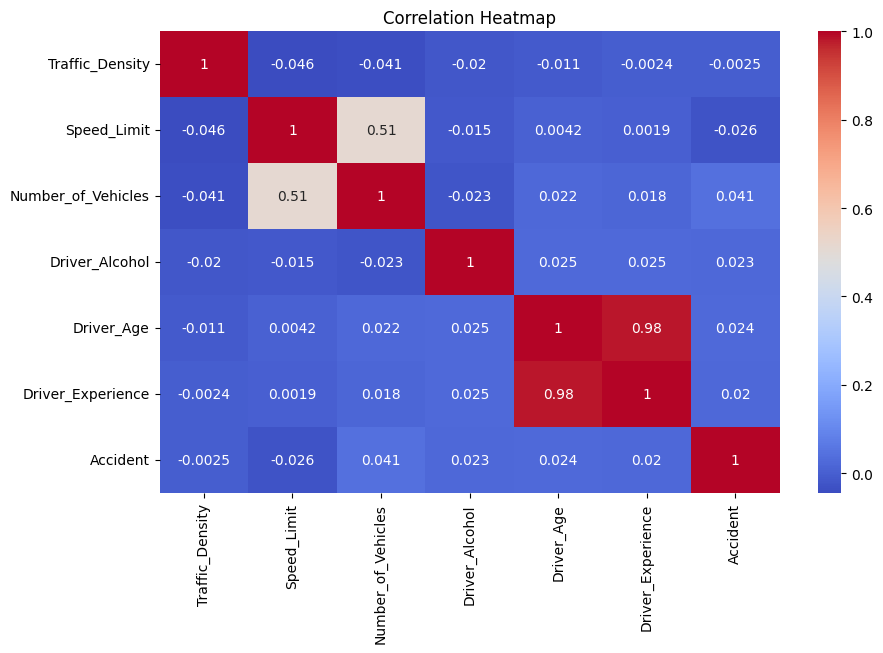


Accuracy: 0.5862068965517241

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.88      0.73        75
         1.0       0.18      0.05      0.08        41

    accuracy                           0.59       116
   macro avg       0.41      0.46      0.41       116
weighted avg       0.47      0.59      0.50       116



In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Load the dataset (uploaded file)
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

print("Sample Data:")
print(df.head())
# Step 3: Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 5: Basic statistics
print("\nDataset Summary:")
print(df.describe())

# Step 6: Data visualization (e.g., correlation heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 7: Preprocess the data
# Select numeric features and drop NaNs
df = df.select_dtypes(include=['number']).dropna()

# Example: Assume last column is the label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Step 8: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [1]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.9 MB/s eta 0:00:00


In [ ]:
# prompt: code for delpoying the above dataset using gradio

import pandas as pd
import gradio as gr

def predict_accident(features):
    # Convert input features to a DataFrame
    input_df = pd.DataFrame([features], columns=X.columns)
    # Make prediction using the trained model
    prediction = model.predict(input_df)[0]
    return prediction


# Create a Gradio interface
iface = gr.Interface(
    fn=predict_accident,
    inputs=list(gr.Number(label=col) for col in X.columns),  # Input fields for each feature
    outputs=gr.Textbox(label="Accident Prediction"),  # Output field for the prediction
    title="Traffic Accident Prediction",
    description="Enter the features to predict the likelihood of a traffic accident.",
)

# Launch the interface
iface.launch()


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1018: UserWarning: Expected 1 arguments for function <function predict_accident at 0x7e1f15c1b600>, received 6.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1026: UserWarning: Expected maximum 1 arguments for function <function predict_accident at 0x7e1f15c1b600>, received 6.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ec9f250af598c09e9f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
